# Data exploration

This notebook aims to provide an (quick) overview of the data and what labels there are.

In [ ]:
!pip3 install pandas
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install wordcloud
!pip3 install nltk

In [ ]:
# Load the data
import pandas as pd
dataset = pd.read_csv('train_data_offensive_abusive_taskC.csv')

## General overview

In this section we looked at some general information of the dataset such as the distriubtion of the labels.

In [ ]:
# Show the first rows
# note: output is removed because it shows the actual data
dataset.head()

In [ ]:
# Get a description of the data
dataset.shape

(6817, 3)

In [ ]:
# Check for missing values
print(dataset.isnull().sum())

id                       0
text                     0
abusive_offensive_not    0
dtype: int64


NOT          4340
ABUSIVE      1391
OFFENSIVE    1086
Name: abusive_offensive_not, dtype: int64


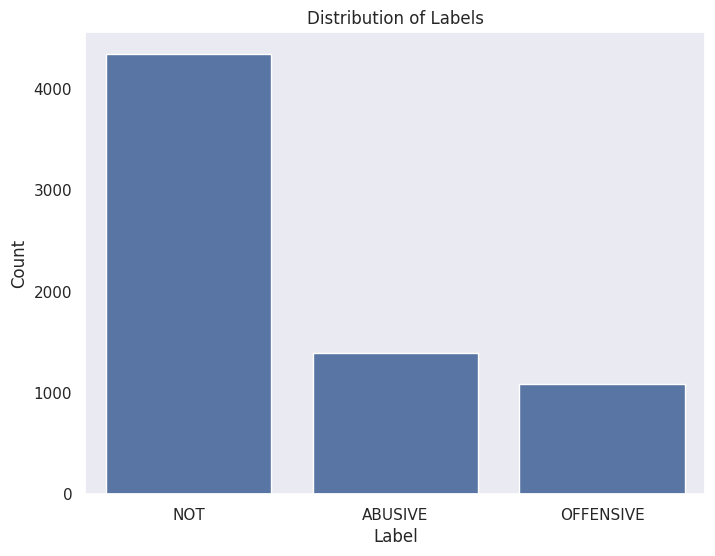

In [ ]:
# Get the labels and show the distribution
import matplotlib.pyplot as plt
import seaborn as sns

print(dataset['abusive_offensive_not'].value_counts())

# Set the style of seaborn
sns.set(style="dark")

# Visualize label distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='abusive_offensive_not', data=dataset)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


In [ ]:
# Calculate the percentages
label_distribution = dataset['abusive_offensive_not'].value_counts(normalize=True) * 100

print("Label Distribution Percentage:")
print(label_distribution)

Label Distribution Percentage:
NOT          63.664368
ABUSIVE      20.404870
OFFENSIVE    15.930761
Name: abusive_offensive_not, dtype: float64


## Possible features exploration

In this section we looked and thought about some possible features.

Note: none of these are used in the final models since we decided to go another direction but they are still interesting so we decided to keep them in this notebook.

#### Tweet length

In [ ]:
dataset['tweet_length'] = dataset['text'].apply(len)

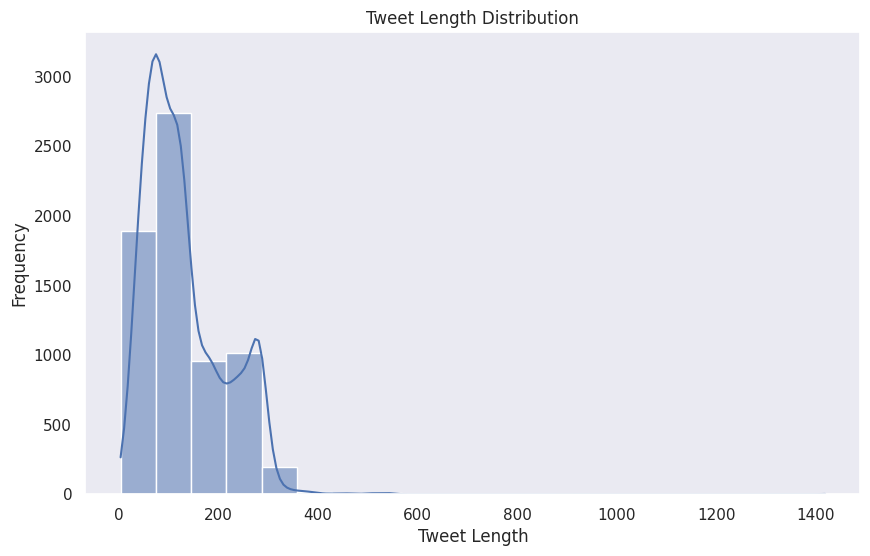

In [ ]:
# Show tweet length distribution throughout the data
plt.figure(figsize=(10, 6))
sns.histplot(dataset['tweet_length'], bins=20, kde=True)
plt.title('Tweet Length Distribution')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

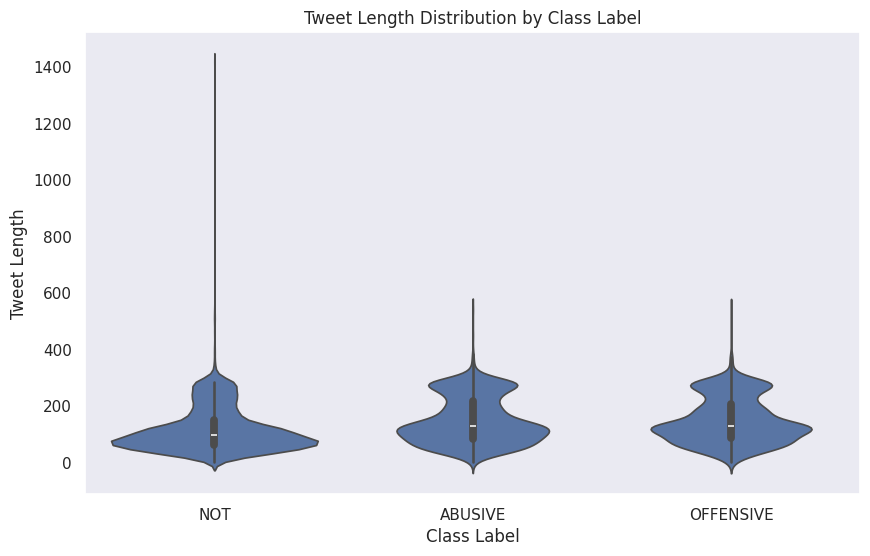

In [ ]:
# Show tweet length distriubtion per class label
plt.figure(figsize=(10, 6))
sns.violinplot(x='abusive_offensive_not', y='tweet_length', data=dataset)
plt.title('Tweet Length Distribution by Class Label')
plt.xlabel('Class Label')
plt.ylabel('Tweet Length')
plt.show()

#### Common words

Show which words are common in the tweets and which words are common for each class.

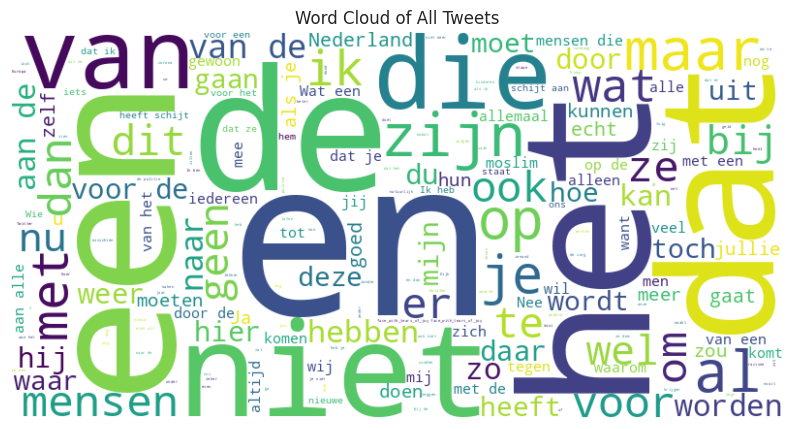

In [ ]:
# Show a general word cloud
from functools import reduce
from wordcloud import WordCloud


all_text = ' '.join(dataset['text'])

# Remove specific texts such as @USER and URL
tweet_words_to_remove = ['@USER', 'USER', 'URL', 'HTTPURL']
replace_func = lambda s, w: s.replace(w, ' ')
all_text = reduce(replace_func, tweet_words_to_remove, all_text)

# Create the word cloud
wordcloud_all = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.title('Word Cloud of All Tweets')
plt.axis('off')
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


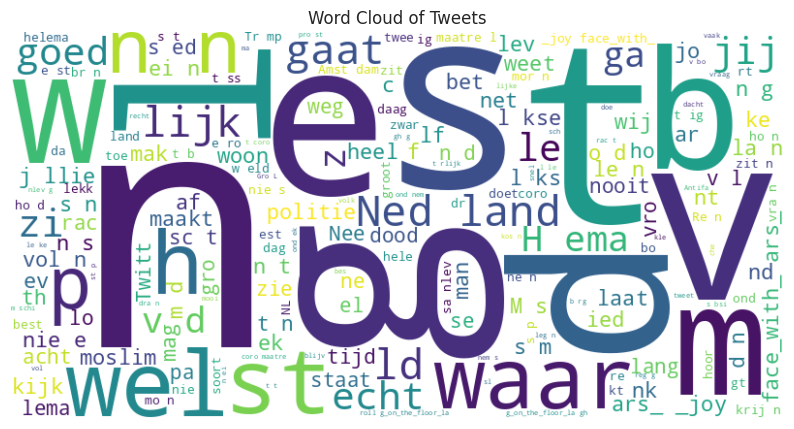

In [ ]:
# Show wordcloud with stopwords removed
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words_dutch = set(stopwords.words('dutch'))

words_to_remove = stop_words_dutch | set(tweet_words_to_remove)

def remove_words(text, words):
    tokens = text.split()
    tokens = [word for word in tokens if word.lower() not in words]
    return " ".join(tokens)

# Remove stopwords
dataset['clean_text'] = dataset['text'].apply(lambda x: remove_words(x, words_to_remove))

# Generate word cloud
clean_all_text = ' '.join(dataset['clean_text'])
clean_all_text = reduce(replace_func, words_to_remove, clean_all_text)
wordcloud_dutch = WordCloud(width=800, height=400, background_color='white').generate(clean_all_text)

# Show the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_dutch, interpolation='bilinear')
plt.title('Word Cloud of Tweets')
plt.axis('off')
plt.show()

<ipython-input-48-93187bc69a0f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[word[1] for word in top_words], y=[word[0] for word in top_words], palette='muted')


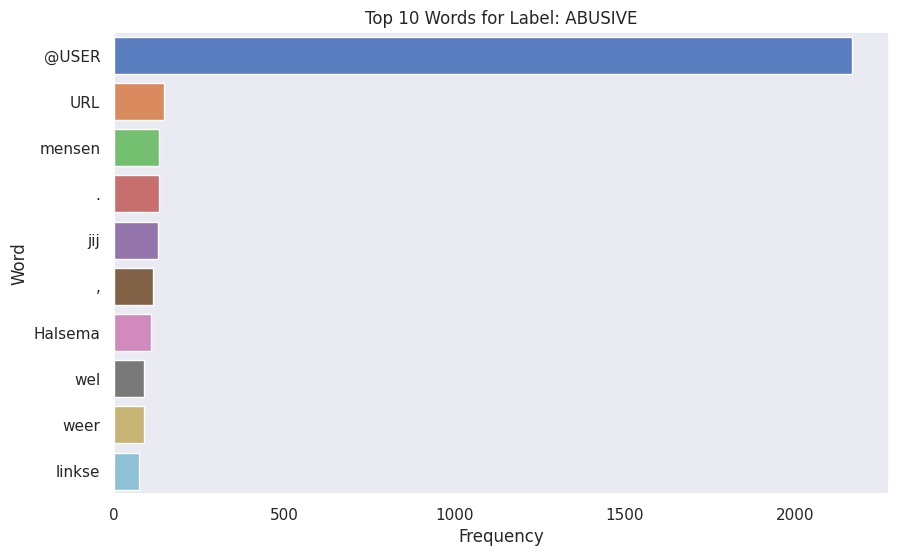

<ipython-input-48-93187bc69a0f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[word[1] for word in top_words], y=[word[0] for word in top_words], palette='muted')


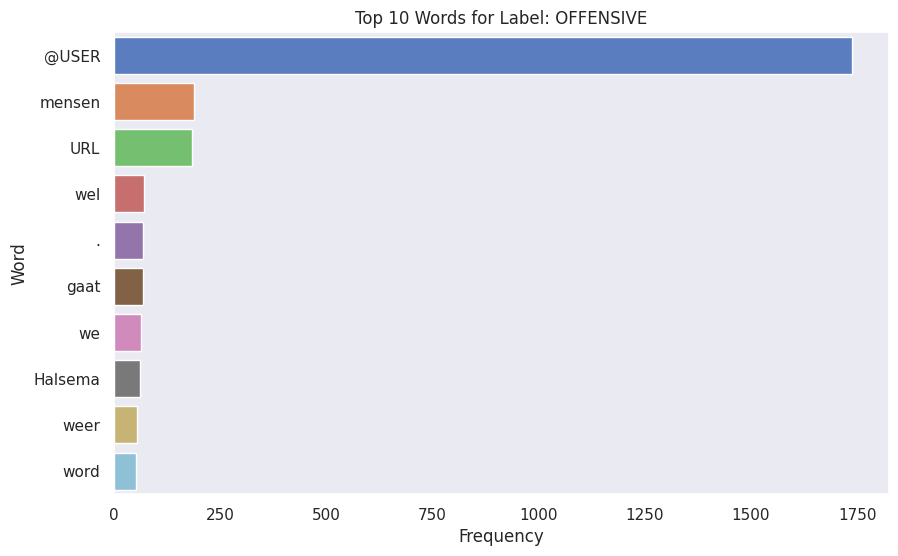

<ipython-input-48-93187bc69a0f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[word[1] for word in top_words], y=[word[0] for word in top_words], palette='muted')


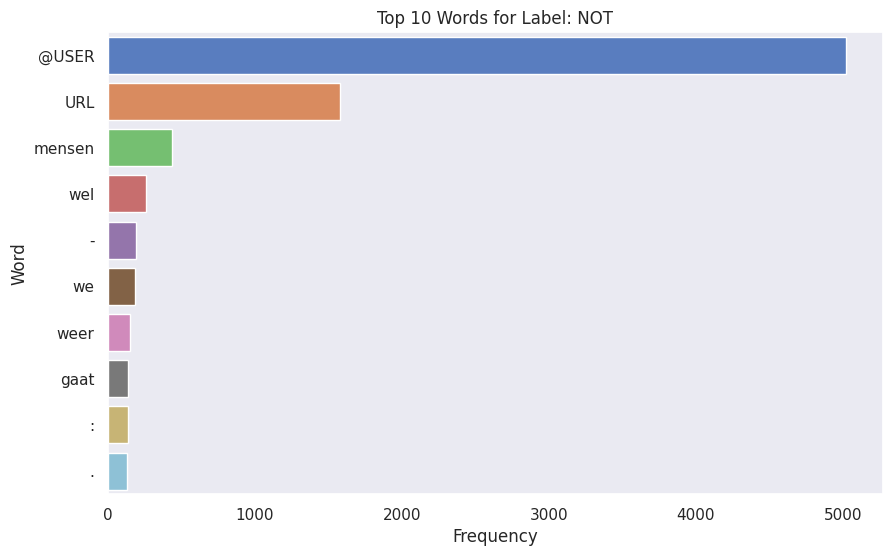

In [ ]:
from collections import Counter

labels = ['ABUSIVE', 'OFFENSIVE', "NOT"]

def common_words_by_label(df, label, n=10):
    label_text = ' '.join(df[df['abusive_offensive_not'] == label]['clean_text'])
    word_freq_label = Counter(label_text.split())
    return word_freq_label.most_common(n)

# Get top 10 common words for each label
top_words_per_label = {label: common_words_by_label(dataset, label, n=10) for label in labels}

# Plot top words for each label
for label in labels:
    top_words = top_words_per_label[label]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=[word[1] for word in top_words], y=[word[0] for word in top_words], palette='muted')
    plt.title(f'Top 10 Words for Label: {label}')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.show()